# Structure of the notebook 

### I. Data cleaning :
  #### 1. Checking data types.
  #### 2. Treatment of  missing data.
  #### 3. Checking the existence of duplicates.
  #### 4. Checking the existence of constant and quasi-constant features.
  #### 5. Verification of the data range constraint for numerical variables.
  #### 6. Investigation of the existence of rare labels in categorical variables.

### II. Exploratory data analysis
  #### 1. Explorating of the distribution of numerical variables.
  #### 2. Investigation of the relationship between price sensitivity and customer  churn.
  #### 3. Further analysis of the data to get more insights.








In [179]:
import re 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import pylab
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
from feature_engine.encoding import RareLabelEncoder
import scipy.stats as stats


## I. Data  cleaning 

In [2]:
client_data = pd.read_csv('client_data.csv')
prices_data = pd.read_csv('price_data.csv')


In [3]:
len(client_data)

14606

In [4]:
len(prices_data)

193002

In [10]:
prices_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [11]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


#### 1. Checking data types


In [13]:
# Checking for data types
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [14]:
prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [19]:
# Transforming the type of columns containing dates.

# A function to change the datatype     
def to_date(df, column):
    """ This function takes as inputs the dataframe and the column and
        convert the type of the column to  datetime  """
    
    df[column] = pd.to_datetime(df[column])


In [33]:
# Getting date columns from the clients data set
date_cols_client = []
for col in client_data.columns:
    pattern = re.findall(r'date_\w+|\w+_date', col)
    if len(pattern) > 0:
        date_cols_client.append(pattern[0])

In [34]:
# Getting date columns from the prices data set
date_cols_prices = []
for col in prices_data.columns:
    pattern = re.findall(r'date_\w+|\w+_date', col)
    if len(pattern) > 0:
        date_cols_prices.append(pattern[0])

In [35]:
# Iterating through the date columns in the clients dataset  
for col in date_cols_client:
    to_date(client_data, col)

In [36]:
# Iterating through the date columns in the prices dataset  
for col in date_cols_prices:
    to_date(prices_data, col)

In [37]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [38]:
prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


#### 2. Treatement of  missing data 

In [39]:
# Creating a function to get the unique values of a colum
def get_unique(df, column):
    return df[column].unique()

# A function used to verify the values used for missing values
def miss_val(df, column, value):
    """ 
    A function to get the indices of the rows with missing values
    
        Inputs:
               - The dataframe object.
               - The name of the column.
               - The value to verify.
        Outputs:
               - list containing the indices of the rows with missing values
    """
    unique_vls = df[column].unique()
    null_rows = []
    for i in range(len(unique_vls)):
        if str(unique_vls[i]) == str(value):
            # returns the index of the missing column
            null_rows.append(df.loc[df[column]==unique_vls[i], df.columns].index)
    return null_rows


In [44]:
# Checking the following values with the clients dataset
vals = ['', '.', '?', np.nan, ' ', 'MISSING', 'missing', 'Missing', '!']

for column in client_data.columns :
    for j in vals:
        if len(miss_val(client_data, column, j))> 0:
            print("The used value  for column '{0}' is '{1}'".format(column, j))
        


The used value  for column 'channel_sales' is 'MISSING'
The used value  for column 'origin_up' is 'MISSING'


In [45]:
# Checking the following values with the prices dataset
vals = ['', '.', '?', np.nan, ' ', 'MISSING', 'missing', 'Missing', '!']

for column in prices_data.columns :
    for j in vals:
        if len(miss_val(prices_data, column, j))> 0:
            print("The used value  for column '{0}' is '{1}'".format(column, j))
        

In [46]:
# Replacing the term "MISSING" with np.nan
client_data.loc[client_data['channel_sales']=="MISSING", 'channel_sales'] = np.nan
client_data.loc[client_data['origin_up']=="MISSING", 'origin_up'] = np.nan

In [47]:
# Checking the following values with the clients dataset
vals = ['', '.', '?', np.nan, ' ', 'MISSING', 'missing', 'Missing', '!']

for column in client_data.columns :
    for j in vals:
        if len(miss_val(client_data, column, j))> 0:
            print("The used value  for column '{0}' is '{1}'".format(column, j))
        

The used value  for column 'channel_sales' is 'nan'
The used value  for column 'origin_up' is 'nan'


We can see that we have now "nan" as a representing value for misssing values 

In [49]:
# Getting the percentages of missing data in each column
client_data.isna().mean()*100

id                                 0.000000
channel_sales                     25.503218
cons_12m                           0.000000
cons_gas_12m                       0.000000
cons_last_month                    0.000000
date_activ                         0.000000
date_end                           0.000000
date_modif_prod                    0.000000
date_renewal                       0.000000
forecast_cons_12m                  0.000000
forecast_cons_year                 0.000000
forecast_discount_energy           0.000000
forecast_meter_rent_12m            0.000000
forecast_price_energy_off_peak     0.000000
forecast_price_energy_peak         0.000000
forecast_price_pow_off_peak        0.000000
has_gas                            0.000000
imp_cons                           0.000000
margin_gross_pow_ele               0.000000
margin_net_pow_ele                 0.000000
nb_prod_act                        0.000000
net_margin                         0.000000
num_years_antig                 

We can see that the feature "channel_sales" has more than 25% of its rows without information. So we will keep this feature apart.
For the second feature with missing data, namely "orgin_up" we will drop the rows with missing data and keep them in a separate data frame.


In [51]:
# Keeping channel_sales apart
df_channel_sales = client_data.pop('channel_sales')


In [55]:
# Keeping the rows with missing data apart.
df_na = client_data[client_data.isna().any(axis=1)]
client_data = client_data[~client_data.isna().any(axis=1)]

In [56]:
client_data.isna().mean()*100

id                                0.0
cons_12m                          0.0
cons_gas_12m                      0.0
cons_last_month                   0.0
date_activ                        0.0
date_end                          0.0
date_modif_prod                   0.0
date_renewal                      0.0
forecast_cons_12m                 0.0
forecast_cons_year                0.0
forecast_discount_energy          0.0
forecast_meter_rent_12m           0.0
forecast_price_energy_off_peak    0.0
forecast_price_energy_peak        0.0
forecast_price_pow_off_peak       0.0
has_gas                           0.0
imp_cons                          0.0
margin_gross_pow_ele              0.0
margin_net_pow_ele                0.0
nb_prod_act                       0.0
net_margin                        0.0
num_years_antig                   0.0
origin_up                         0.0
pow_max                           0.0
churn                             0.0
dtype: float64

#### 3. Checking the existence of duplicates 

In [57]:
# Getting the duplicated columns for the client data set
dup = client_data.duplicated()
client_data[dup]

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [60]:
# Getting the duplicated columns for the client data set
dup = prices_data.duplicated()
prices_data[dup]

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


So there is no duplicated columns in both datasets


In [61]:
# Checking the existence of duplicated features for the client dataset
sel_1_clt = DropDuplicateFeatures()
sel_1_clt.fit(client_data)


DropDuplicateFeatures()

In [62]:
sel_1_clt.features_to_drop_

set()

So we got an empty set which means that there is no duplicated features in the client dataset

In [65]:
# Checking the existence of duplicated features in the prices dataset
sel_1_pr = DropDuplicateFeatures()
sel_1_pr.fit(prices_data)


DropDuplicateFeatures()

In [66]:
sel_1_pr.features_to_drop_

set()

The same thing for the prices dataset.

#### 4. Checking the existence of constant and quasi-constant features

Constant and quasi-constant features contain almost no information that the model can use to discriminate between data points. So the best thing to do when have this kind of features is to drop them. 

In [68]:
# Checking the existence of constant and quasi-constant features in the clients dataset
# Variables showing the same value in a percentage of observations greater than 
# "tol" will be considered as constant/quasi-constant and dropped.
sel_2_clt = DropConstantFeatures(tol=0.98)
sel_2_clt.fit(client_data)


DropConstantFeatures(tol=0.98)

In [69]:
sel_2_clt.features_to_drop_

[]

So we got an empty list which means that there is no constant/quasi-constant features

In [71]:
# Checking the existence of constant and quasi-constant features in the clients dataset

sel_2_pr = DropConstantFeatures(tol=0.98)
sel_2_pr.fit(prices_data)

DropConstantFeatures(tol=0.98)

In [72]:
sel_2_pr.features_to_drop_

[]

We got an empty list which means that there is no constant/quasi-constant features

####  5. Verification of the data range constraint for numerical variables


In [99]:
# Getting the categorical features in the clients dataset
cat_ftr_clt = [col for col in client_data.columns if client_data[col].dtype == 'O']

# Getting the categorical features in the clients dataset
num_ftr_clt = [col for col in client_data.columns if col not in cat_ftr_clt + date_cols_client]

In [100]:
# Checking the number of features 
print((len(cat_ftr_clt) + len(num_ftr_clt) + len(date_cols_client)) == len(client_data.columns))

True


In [108]:
# Getting the categorical features in the clients dataset
num_ftr_pr = [col for col in prices_data.columns if prices_data[col].dtype == 'float64']

# Getting the categorical features in the clients dataset
cat_ftr_pr = [col for col in prices_data.columns if prices_data[col].dtype not in ['datetime64','float64']]

In [103]:
# Investigating the existence of negative values in the clients dataset

for col in num_ftr_clt:
    if client_data[col].min() < 0:
        print("Feature {} has negative values".format(col))

In [110]:
# Investigating the existence of negative values in the prices dataset

for col in num_ftr_pr:
    if prices_data[col].min() < 0:
        print("Feature {} has negative values".format(col))

So there is no negative values in both datasets

#### 6. Investigation of the existence of rare labels in categorical variables

Rare labels can cause the following issues :
    
   - The data points with rare categories are so few that the algorithm does not get any information from them, which turns them into a source of noise that can make the model overfit the data.
    
   - Rare labels may appear only in the test set which will make it hard for the model to evaluate them. 


In [164]:
for col in cat_ftr_clt:
    if col != 'id':
        for cat in client_data[col].unique():
            perct = round(len(client_data[client_data[col] == cat])/len(client_data) * 100, 2)
            print("For feature '{}' the percentage of datapoints with category '{}' is: \n{} %".format(col,cat,perct))
            print("-------------------------------------------------------------------")
          

For feature 'has_gas' the percentage of datapoints with category 't' is: 
18.12 %
-------------------------------------------------------------------
For feature 'has_gas' the percentage of datapoints with category 'f' is: 
81.88 %
-------------------------------------------------------------------
For feature 'origin_up' the percentage of datapoints with category 'lxidpiddsbxsbosboudacockeimpuepw' is: 
48.8 %
-------------------------------------------------------------------
For feature 'origin_up' the percentage of datapoints with category 'kamkkxfxxuwbdslkwifmmcsiusiuosws' is: 
29.53 %
-------------------------------------------------------------------
For feature 'origin_up' the percentage of datapoints with category 'ldkssxwpmemidmecebumciepifcamkci' is: 
21.65 %
-------------------------------------------------------------------
For feature 'origin_up' the percentage of datapoints with category 'usapbepcfoloekilkwsdiboslwaxobdp' is: 
0.01 %
--------------------------------------

In [169]:
# Grouping rare categories (present in less than 5% of the data points) in a new
# category called "rare"
enc = RareLabelEncoder(variables=['origin_up'],n_categories=4, tol=0.05)
enc.fit(client_data)

RareLabelEncoder(n_categories=4, variables=['origin_up'])

In [171]:
client_data = enc.transform(client_data)
client_data['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'Rare'], dtype=object)

### II. Exploratory data analysis

#### 1. Exploring  the distribution of numerical variables.

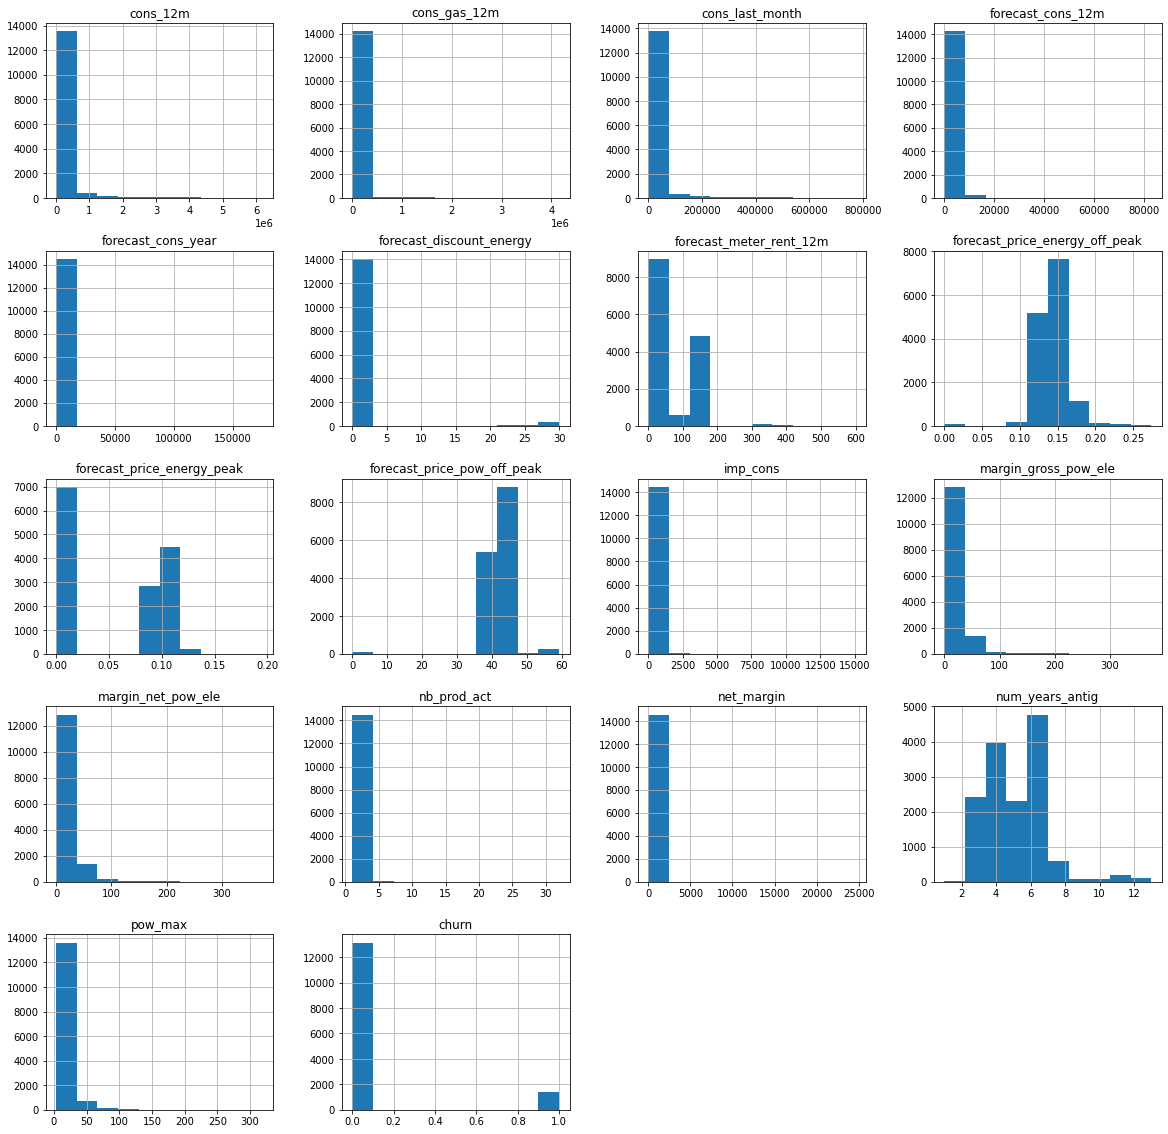

In [182]:
client_data[num_ftr_clt].hist(figsize=(20,20))
plt.show()

In [175]:
# Plots to assess normality 
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, column):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[column].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)

    plt.show()

Plots for feature cons_12m


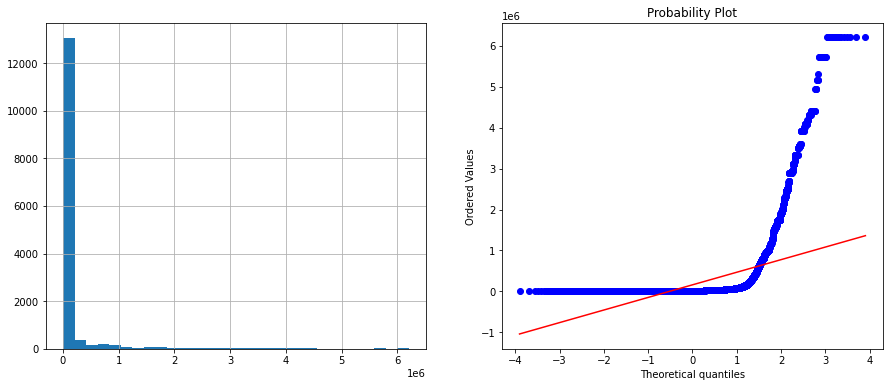

Plots for feature cons_gas_12m


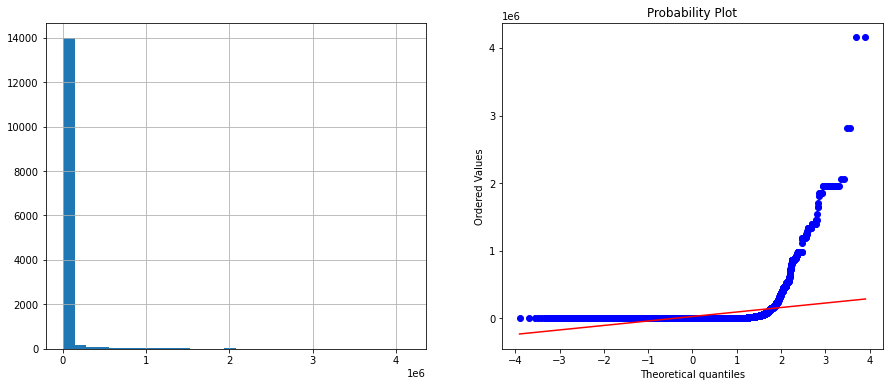

Plots for feature cons_last_month


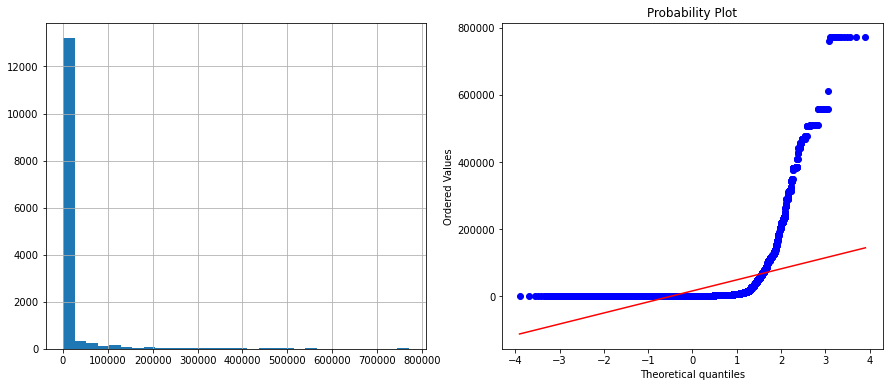

Plots for feature forecast_cons_12m


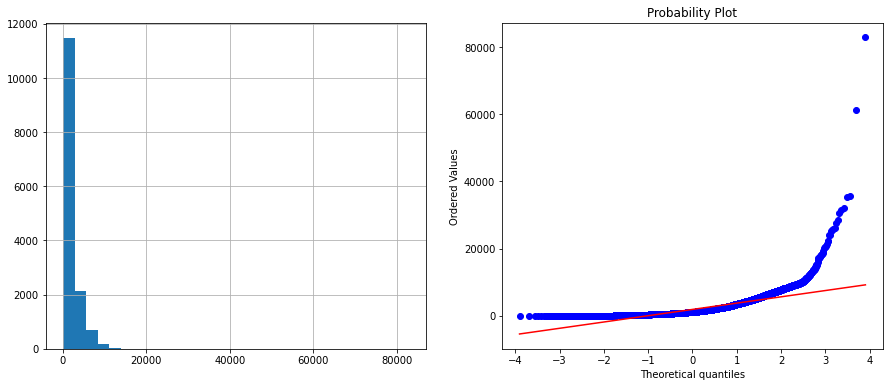

Plots for feature forecast_cons_year


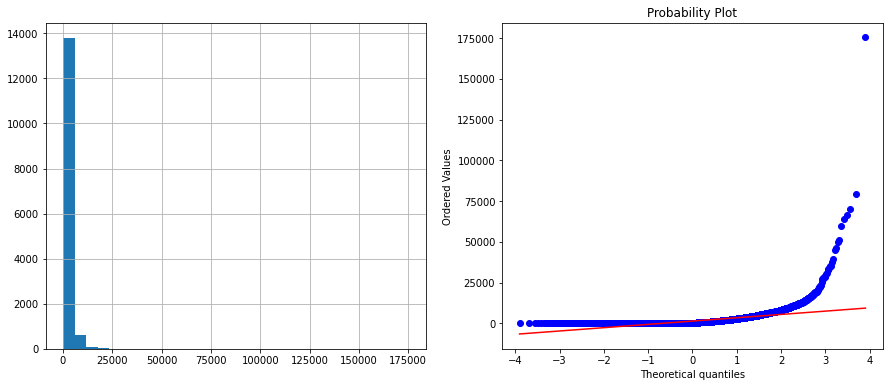

Plots for feature forecast_discount_energy


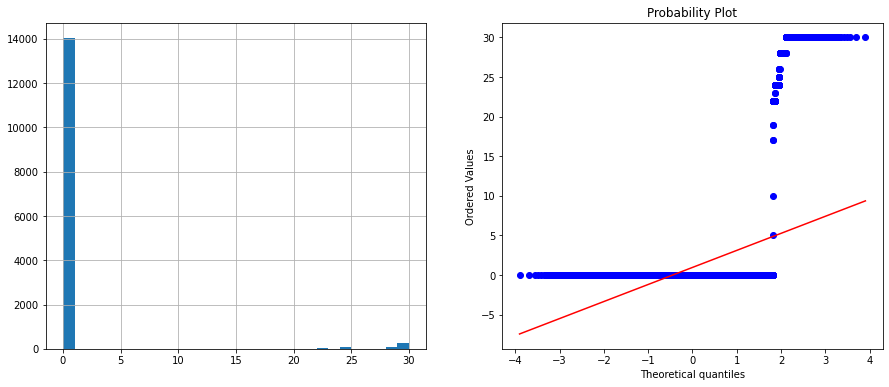

Plots for feature forecast_meter_rent_12m


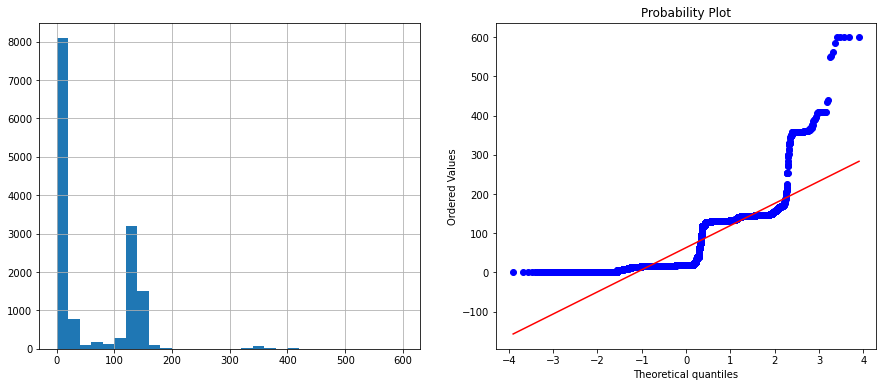

Plots for feature forecast_price_energy_off_peak


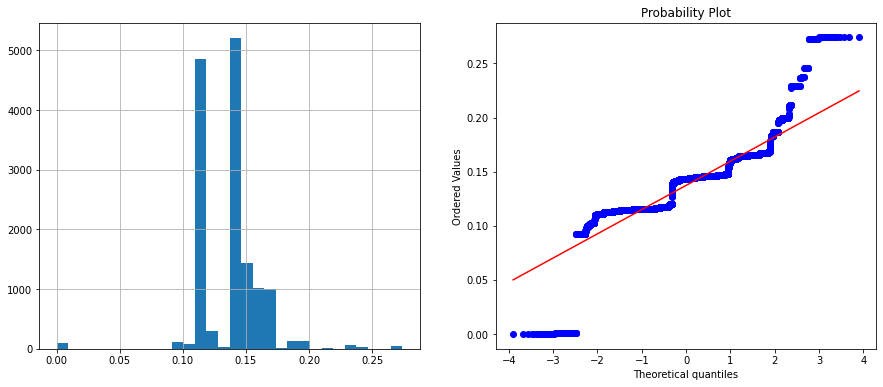

Plots for feature forecast_price_energy_peak


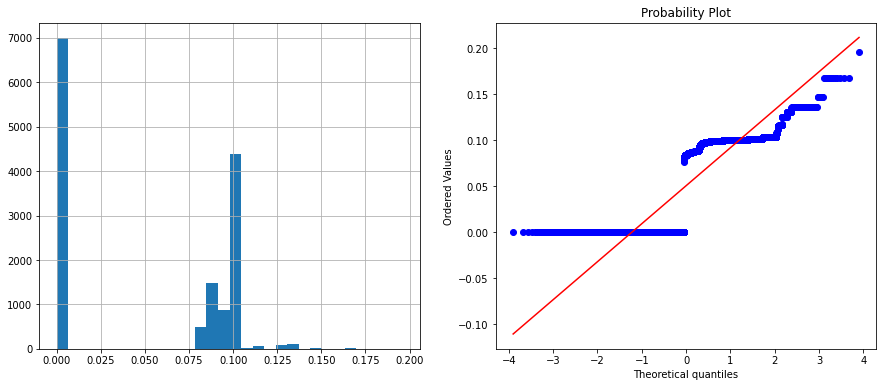

Plots for feature forecast_price_pow_off_peak


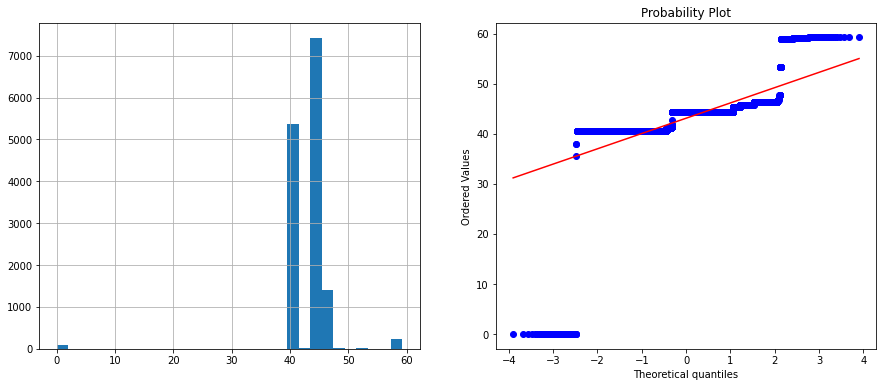

Plots for feature imp_cons


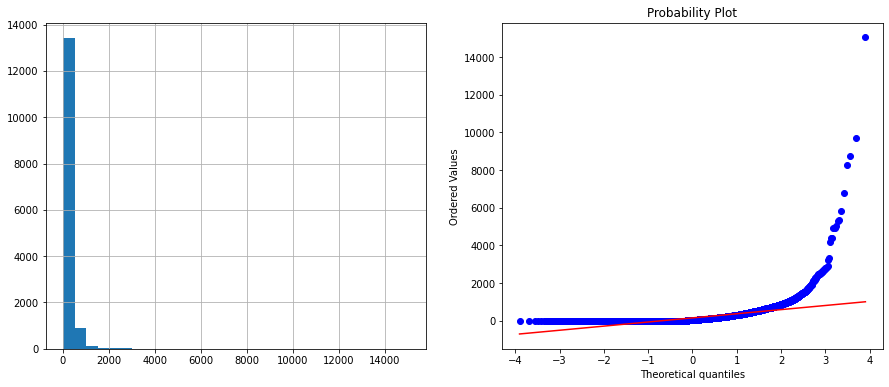

Plots for feature margin_gross_pow_ele


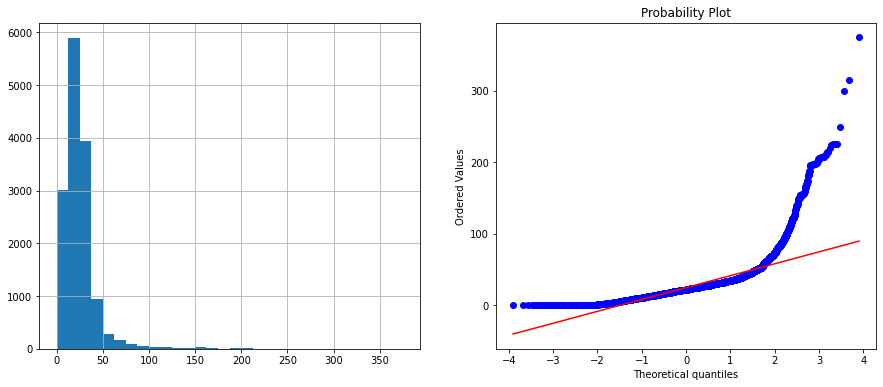

Plots for feature margin_net_pow_ele


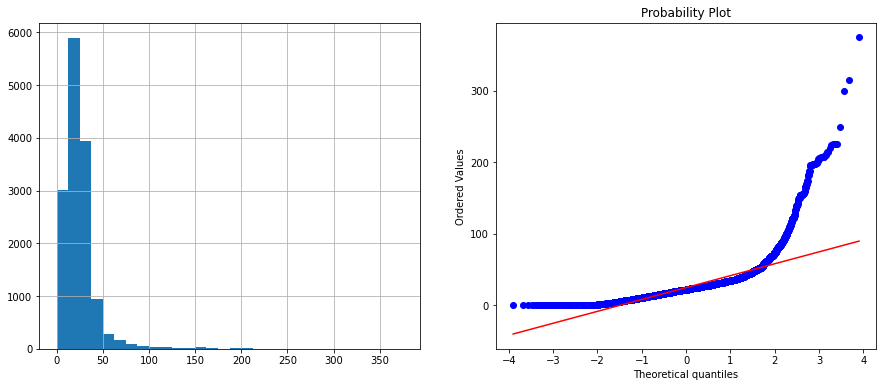

Plots for feature nb_prod_act


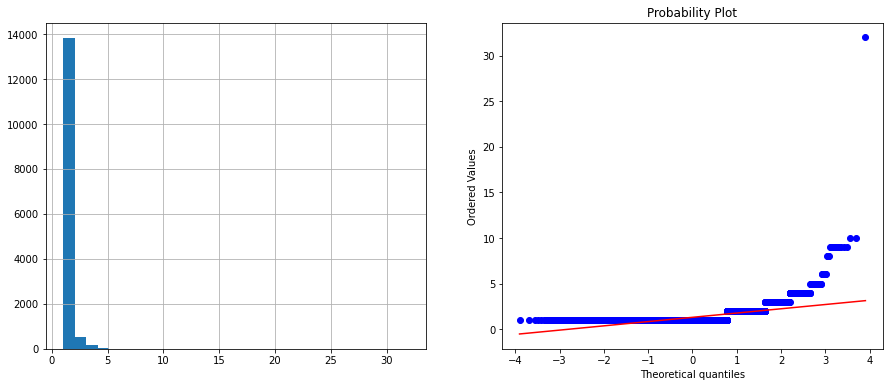

Plots for feature net_margin


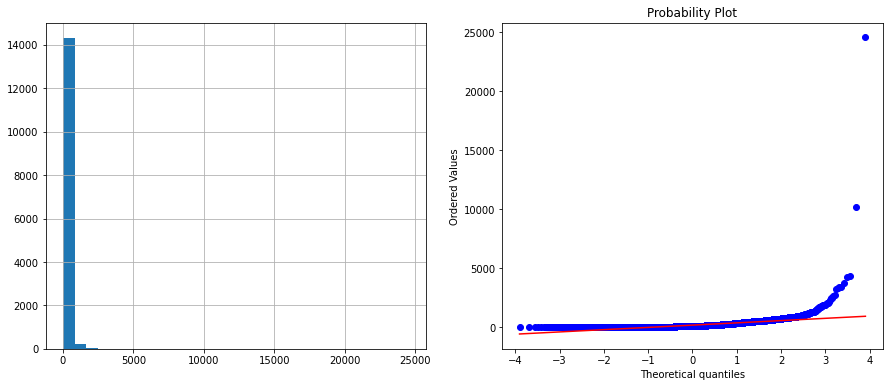

Plots for feature num_years_antig


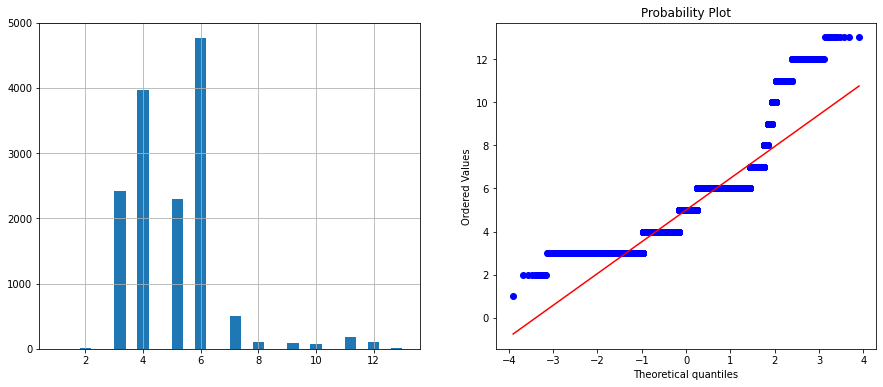

Plots for feature pow_max


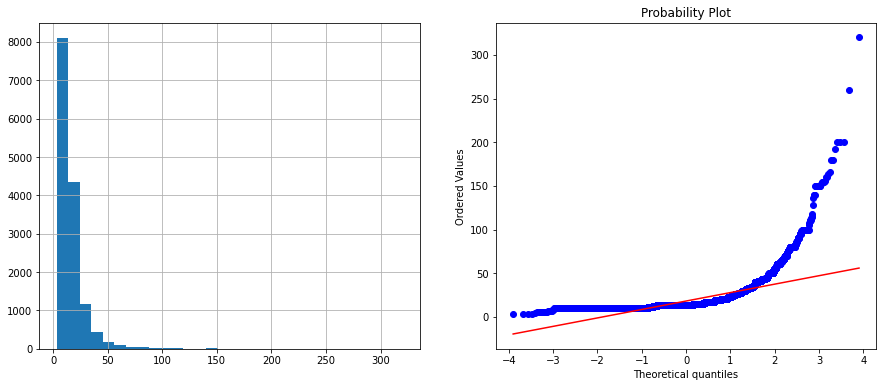

Plots for feature churn


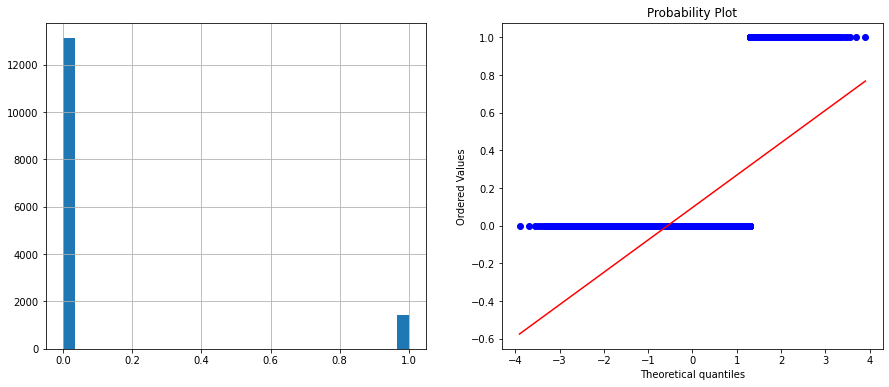

In [181]:
for col in num_ftr_clt:
    print('Plots for feature {}'.format(col))
    diagnostic_plots(client_data, col)

#### 2. Investigation of the relationship between price sensitivity and customer churn


Price sensistivity is a concept that helps us understand how the willingness to buy of a customer is affected by the price of a product or a service.
To quantify this concept we will use the elasticity of demand that can computed using the following formula:

    Price elasticity of demand = % change in quantity demanded / % change in price

- To compute % change in quantity we will use the variables "cons_12m" and "forecast_cons_12m".
- To compute % change in price we will use the average of the two variables "forecast_price_energy_off_peak" and "forecast_price_energy_peak" and the average of the variables "price_off_peak_var" and "price_peak_var".



In [195]:
# Getting the previous year average price for each customer using the price dataset
gr_df_pr =prices_data.groupby(['id'])[prices_data.columns].mean().reset_index()

In [198]:
# Merging the two dataframes 
new_df = client_data.merge(gr_df_pr, how='left', left_on='id', right_on='id')
new_df

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14537,18463073fb097fc0ac5d3e040f356987,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000
14538,d0a6f71671571ed83b2645d23af6de00,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,...,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418
14539,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
14540,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,...,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000


In [205]:
# Averaging forcasted peak and off-peak prices.
new_df["forcasted_price"] = (new_df["forecast_price_energy_off_peak"] + new_df["forecast_price_energy_peak"])/2

# Averaging previous peak and off-peak prices.
new_df["previous_price"] = new_df["price_off_peak_var"] + new_df["price_off_peak_fix"]

In [212]:
# Computing the percentage change in quantity demanded
prct_qte = ((new_df['forecast_cons_12m'] - new_df['cons_12m'])/new_df['cons_12m']) * 100

# Computing the percentage change in price
prct_prc = ((new_df["forcasted_price"] - new_df["previous_price"])/new_df["previous_price"]) * 100

# Computing the price elasticity of demand
new_df['price_sens'] = prct_qte/prct_prc

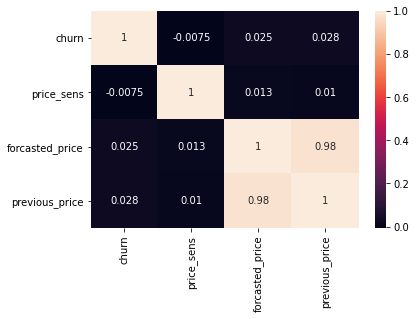

In [222]:
# Plotting the correlation matrix 
sns.heatmap(new_df[['churn', 'price_sens', 'forcasted_price','previous_price']].corr(), annot=True)
plt.show()


We can see that there is almost no correlation between price sensitivity - and other price related variables - and customer churn.

#### 3. Further analysis of the data to get more insights 

In [329]:
# Getting the median price for clients who did churn and for those who did not

round_func = lambda x : round(x, 3)
churn_price = pd.DataFrame(new_df.groupby(['churn'])['previous_price'].median()).apply(round_func)
churn_price


,previous_price
churn,
0,0.109
1,0.111


In [330]:
# Getting the median of the forcasted price for clients who did churn and for those who did not

churn_forc_price = pd.DataFrame(new_df.groupby(['churn'])['forcasted_price'].median()).apply(round_func).reset_index()
churn_forc_price

,churn,forcasted_price
0,0,0.103
1,1,0.105


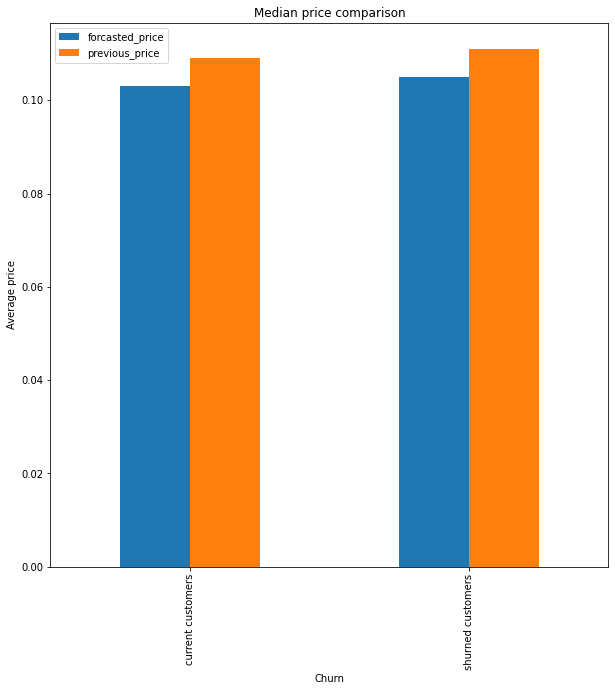

In [331]:
churn_viz = churn_forc_price.merge(churn_price, how='left', on='churn').set_index('churn')
churn_viz.plot(kind='bar', figsize=(10,10))
plt.title('Median price comparison')
plt.xlabel('Churn')
plt.ylabel('Average price')
plt.xticks(ticks =np.arange(2), labels=['current customers','shurned customers'])
plt.show()

We can see that the median price values for customers who did churn and for those who did not, are almost the same. 


In [325]:
# Getting the last month consumption of electricity for clients who did churn and for those who did not
churn_last_month = pd.DataFrame(new_df.groupby(['churn'])['cons_last_month'].mean())
churn_last_month

,cons_last_month
churn,
0,17093.442599
1,7216.081979


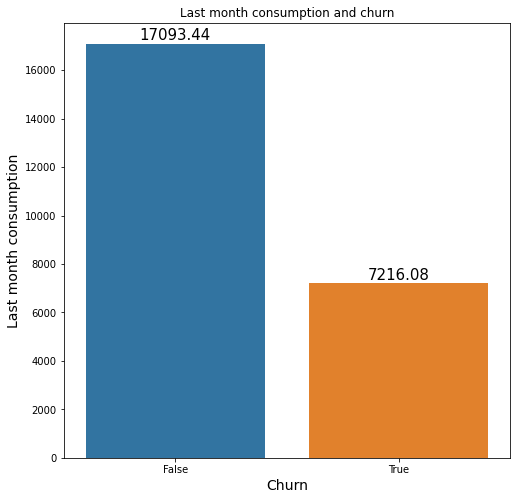

In [327]:
# Code source: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="churn", y="cons_last_month", data=churn_last_month.reset_index())
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Churn", size=14)
 
# Setting the label for y-axis
plt.ylabel("Last month consumption", size=14)
 
# Setting the title for the graph
plt.title("Last month consumption and churn")

plt.xticks(np.arange(2), labels=['False', 'True'])
 
# Finally showing the plot
plt.show()

On average a churned customer consumes in total  42 % of what a not churning customer consumes in the last month before leaving.


In [323]:
# The number of churned customers who were gaz consumers
churn_has_gas = pd.DataFrame(new_df.groupby(['has_gas'])['churn'].sum())
churn_has_gas

,churn
has_gas,
f,1199
t,216


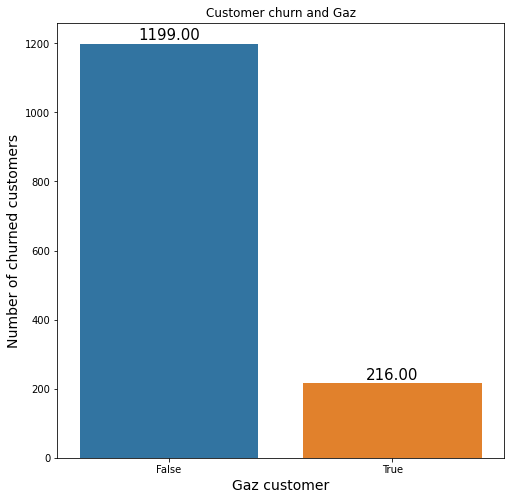

In [322]:
# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="has_gas", y="churn", data=churn_has_gas.reset_index())
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Gaz customer", size=14)
 
# Setting the label for y-axis
plt.ylabel("Number of churned customers", size=14)
 
# Setting the title for the graph
plt.title("Customer churn and Gaz")

plt.xticks(np.arange(2), labels=['False', 'True'])
 
# Finally showing the plot
plt.show()

We can see that 85% of churned customer were not gas buyers.

In [339]:
new_df.to_csv('clean_data_after_eda.csv')